# The Solow Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import sympy as sm
import ipywidgets as widgets
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# The general solow model - definition

Consider the **standard Solow-model** where:

1. $K_t$ is capital
2. $L_t$ is labor (growing with a constant rate of $n$)
3. $A_t$ is technology (growing with a constant rate of $g$)
4. $Y_t = F(K_t,A_tL_t)$ is GDP

The Cobb Douglas function for the representative firm is given by:
$$
Y_t=K_t^\alpha (A_t L_t)^{1-\alpha}
$$

**Saving** is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that **capital accumulates** according to

$$
K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1)
$$

The **production function** has **constant-return to scale** such that

$$
\frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t})
$$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$
\tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}]
$$

If the **production function** is **Cobb-Douglas** then

$$
F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha}
$$

If it is **CES** (with $\beta < 1, \beta \neq 0$) then

$$
F(K_{t},A_{t}L_{t})=(\alpha K_{t}^{\beta}+(1-\alpha)(A_{t}L_{t})^{\beta})^{\frac{1}{\beta}}\Rightarrow f(\tilde{k}_{t})=(\alpha\tilde{k}_{t}^{\beta}+(1-\alpha))^{\frac{1}{\beta}}
$$


when using sympy to fine the steady state, we have to solve the following:

$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$


In [2]:
# use sympy for defining symbols and functions

# define symbols
k = sm.symbols('k')
s = sm.symbols('s')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
n = sm.symbols('n')
g = sm.symbols('g')

# define function
f = sm.Function('f')(k)
f = k**alpha

# Define function to solve for steady state
ss = sm.Eq(k,(s*f + (1-delta)*k )/((1+n)*(1+g)))


The steady state can now be solved analytically

In [3]:
# solving for steady state analytically
ss_sol = sm.solve(ss,k)[0]
ss_sol


((delta + g*n + g + n)/s)**(1/(alpha - 1))

In [4]:
# Transformation into python function
ss_sol_func = sm.lambdify((s,alpha,delta,n,g),ss_sol)


We can now set parameter values and calculate the steady state

In [5]:
# Define parameters
s = 0.3
alpha = 0.3
delta = 0.1
n = 0.01
g = 0.02

In [6]:
# show the result of the steady state calculated analytically

print('The steady state is: ',ss_sol_func(s,alpha,delta,n,g))

The steady state is:  3.2951243994886896


# Calculation numerically

In stead of finding the steady state analytically, one can also do it numerically. This is done by creating a root finding problem, and then solve for the root

$$
0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} 
$$

In [7]:
# Define parameters
s = 0.3
alpha = 0.3
delta = 0.1
n = 0.01
g = 0.02

# write your code here
f = lambda k: k**alpha
obj_kss = lambda kss: kss - (s*f(kss) + (1-delta)*kss)/((1+g)*(1+n))
result = optimize.root_scalar(obj_kss,bracket=[0.1,100],method='brentq')

print('the steady state for k is', result.root)  

the steady state for k is 3.295124399488689


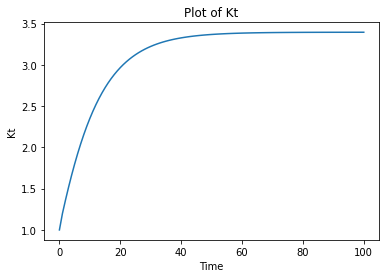

In [29]:
# Define the cobb douglas function

def cobb_douglas(K, L, A, alpha):
    """
    K: Capital
    L: Labor
    A: Total Factor Productivity (TFP)
    alpha: Output elasticity of capital
    """
    return A * K**alpha * L**(1 - alpha)

# Define the solow model parameters
s = 0.3
alpha = 0.3
delta = 0.1
n = 0.01
g = 0.02

# Define the initial values
K0 = 1
L0 = 1
A0 = 1
Y0 = 1
Kt = 1

# Define the time period
T = 100

# Define the empty lists
K = [K0]
L = [L0]
A = [A0]
Y = [Y0]
Kt = [Kt]

# Define the loop
for t in range(T):
    Kt_new = s * cobb_douglas(K[t] / (A[t] * L[t]), 1, 1, alpha) + (1 - delta) * K[t] / (A[t] * L[t])
    K_new = Kt_new * A[t] * L[t]
    K.append(K_new)

    L_new = (1 + n) * L[t]
    L.append(L_new)

    A_new = (1 + g) * A[t]
    A.append(A_new)

    Y_new = cobb_douglas(K_new, L_new, A_new, alpha)
    Y.append(Y_new)

    Kt.append(Kt_new)


# plot Kt 
plt.plot(Kt)
plt.title('Plot of Kt')
plt.xlabel('Time')
plt.ylabel('Kt')
plt.show()


